<a href="https://colab.research.google.com/github/RozitaAbdoli/credit_default_mining/blob/main/FE_normaliza%2Bremove_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- The top 5 predictor variables are : LIMIT_BAL, Repay_Sept, Pay_Sept, Age, and Pay_Apr. Look at the distributions of these variables.
- Repay_Sept is categorical, so distribution is not very meaningful for this feature.
- For the remaining 4 features that are numeric, can see that they are skewed right with outliers at the high end.
 

In [ ]:
# Install necessary packages and import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import kurtosis, skew
from scipy.special import boxcox1p   #since there are zeros in the data, and the regular boxcox only accepts positive values

In [ ]:
#Import Drive API and authenticate
from google.colab import drive
#Mount Drive to the Colab VM
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the dataset into pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/Capstone_project/v2_credit_default.csv")

In [ ]:
#Change the global figure parameters. Options: ‘xx-small’, ‘x-small’, ‘small’, ‘medium’, ‘large’, ‘x-large’, ‘xx-large’.
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 22,
         'axes.titlesize':'x-large',
         'xtick.labelsize':18,
         'ytick.labelsize':18}
pylab.rcParams.update(params)

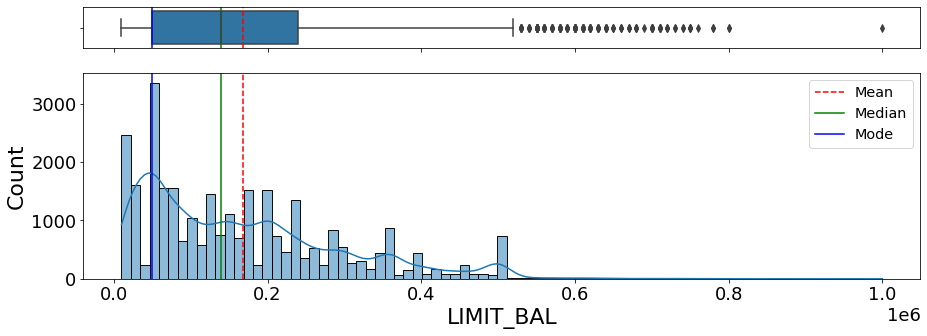

In [ ]:
# Box plot and histogram of the numeric attribute LIMIT_BAL with vertical lines showing mean, median, and mode
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['LIMIT_BAL'].mean()
median=df['LIMIT_BAL'].median()
mode=df['LIMIT_BAL'].mode().values[0]

sns.boxplot(data=df, x='LIMIT_BAL', ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="LIMIT_BAL", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()
#Insight: LIMIT_BAL is right-skewed (few values at the very high end)

In [ ]:
df.LIMIT_BAL.skew()

0.9934913272313394

In [ ]:
# # For LIMIT_BAL, can also apply regular Box-Cox transformation since there are no zeros
# LIMIT_BAL_boxcox = stats.boxcox(df['LIMIT_BAL'])[0]
# pd.Series(LIMIT_BAL_boxcox).skew()
# # absolute value of skew is reduced

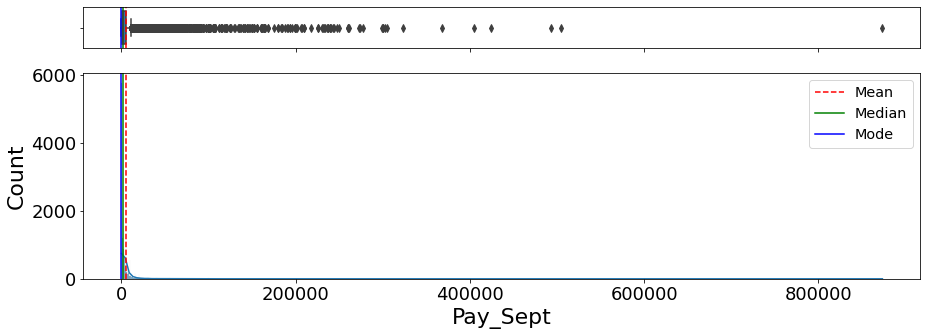

In [ ]:
# Pay_Sept
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['Pay_Sept'].mean()
median=df['Pay_Sept'].median()
mode=df['Pay_Sept'].mode().values[0]

sns.boxplot(data=df, x="Pay_Sept", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="Pay_Sept", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()
# Pay_Sept has a lot of outliers to the right

In [ ]:
skew(df.Pay_Sept)

14.660860590789186

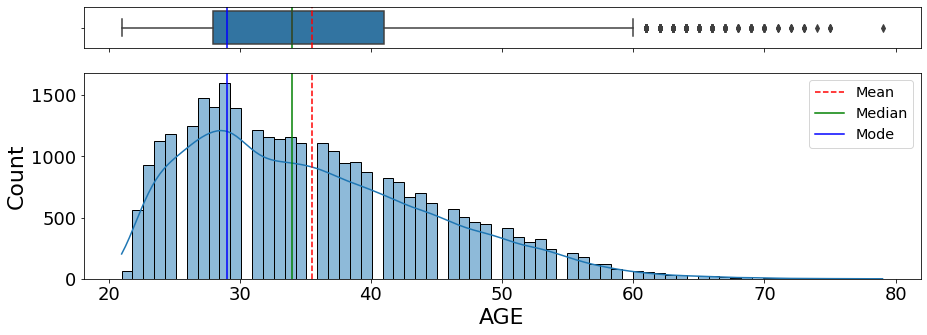

In [ ]:
# AGE
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['AGE'].mean()
median=df['AGE'].median()
mode=df['AGE'].mode().values[0]

sns.boxplot(data=df, x="AGE", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="AGE", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()
# AGE is right skewed

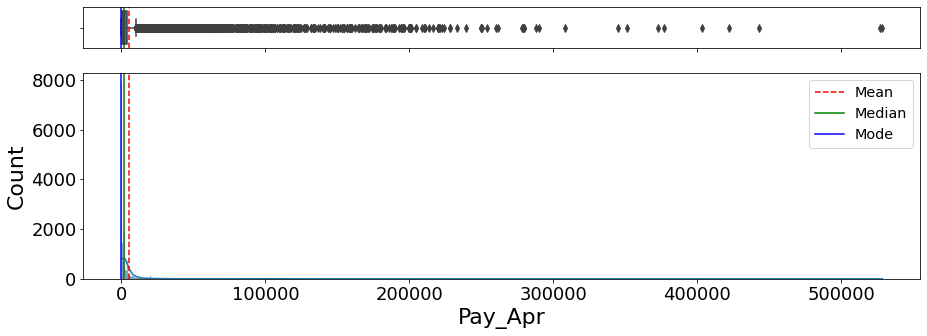

In [ ]:
# Pay_Apr
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['Pay_Apr'].mean()
median=df['Pay_Apr'].median()
mode=df['Pay_Apr'].mode().values[0]

sns.boxplot(data=df, x="Pay_Apr", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="Pay_Apr", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()
# Insight: very skewed distribution and a lot of outliers to the right

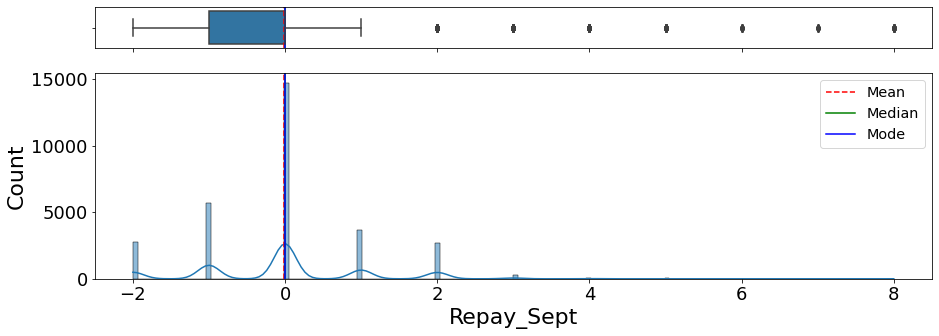

In [ ]:
# Repay_Sept
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['Repay_Sept'].mean()
median=df['Repay_Sept'].median()
mode=df['Repay_Sept'].mode().values[0]

sns.boxplot(data=df, x="Repay_Sept", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="Repay_Sept", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()
# Repay_Sept is categorical with most items in category 0.

#### Box-Cox transformation and recalculation of skew


In [ ]:
df = df.apply(lambda x: boxcox1p(x,0.25))

In [ ]:
print(df.Pay_Sept.skew())
print(df_boxcox.Pay_Sept.skew())
# Can see the skew for Pay_Sept is reduced, and now is close to normal distribution (skew=0)

0.16054180896597542
0.16054180896597542


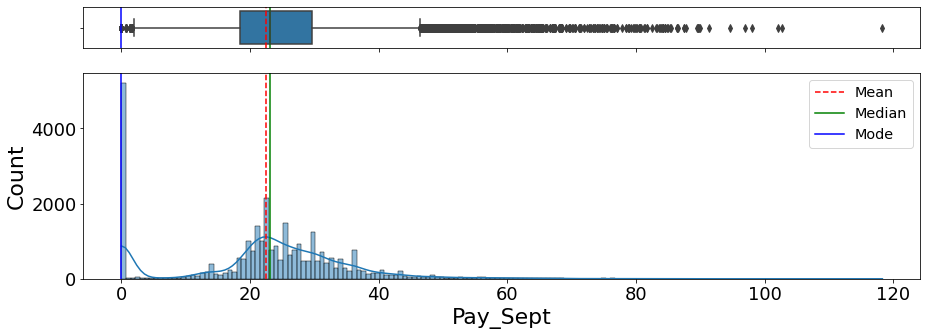

In [ ]:
# look at Pay_Sept again after applying boxcox for normalization
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['Pay_Sept'].mean()
median=df['Pay_Sept'].median()
mode=df['Pay_Sept'].mode().values[0]

sns.boxplot(data=df, x="Pay_Sept", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="Pay_Sept", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()
# Much closer to normal distribution now. But still a lot of zeros.

#### Removing outliers

In [ ]:
# Outliers here defined as values that are < (Q1 - 1.5 * IQR) or > (Q3 + 1.5 * IQR). In other words, they are outside the whiskers of the box-plot
cols = ['Pay_Sept'] # removing Pay_Sept column's outliers. But can add more columns to the list.

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

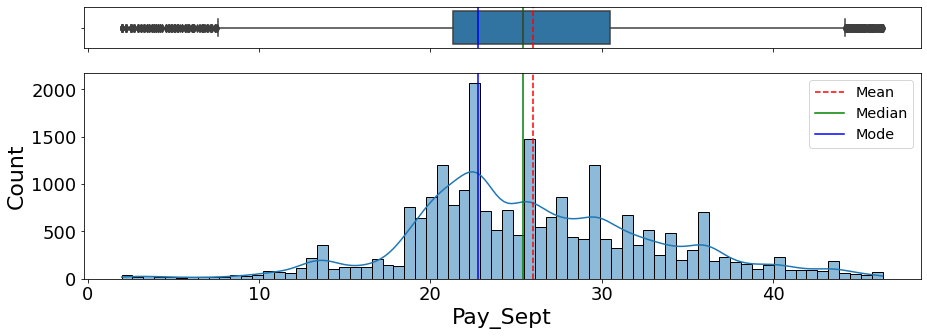

In [ ]:
# look at Pay_Sept again after applying removing outliers
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['Pay_Sept'].mean()
median=df['Pay_Sept'].median()
mode=df['Pay_Sept'].mode().values[0]

sns.boxplot(data=df, x="Pay_Sept", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="Pay_Sept", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()
# Observation: values right at the boundary (Q1 - 1.5 * IQR) and (Q3 + 1.5 * IQR) remain, but the more extreme outliers are removed now. 
# Can see that the location of the mode is now changed.